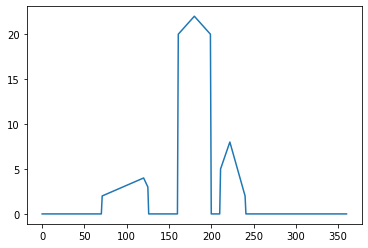

In [19]:
# https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive
# https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51
# https://re.jrc.ec.europa.eu/pvg_tools/es/#MR

from flask import Flask, jsonify, render_template, request, session
import pandas as pd # data wrangling
import requests as requests
import pandas as pd 
import json
import datetime
from math import pi
import numpy as np
import matplotlib.pyplot as plt


# vvalores inciales

pp=[[-180,0],[-110,0],[-109,2],[-60,4],[-55,3],[-54,0],[-20,0],[-19,20],[0,22],[19,20],[20,0],[30,0],[31,5],[40,7],[60,2],[61,0],[180,0]]
df=pd.DataFrame(pp)


# cuando se modifica un punto en el front
punto='0,12,42,8'

ppunto = pd.DataFrame([x.split(',') for x in punto.split('\n')])
ppunto=ppunto.astype(int)
# actualiza la tabla de puntos
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),0]=ppunto.at[0,2]
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),1]=ppunto.at[0,3]
df[0]=df[0]+180
# df
# fig,ax=plt.subplots(figsize=(15,8))
# ax.plot(df[0],df[1])
# # .tolist()
# para crear los 360 puntos para el pvgis
d = pd.Series(np.nan, index=np.arange(360))

ii=df.index.tolist()
for i in ii: 
#     print(i) 
    d.at[df.at[i,0]]=df.at[i,1]
d=d.interpolate()
d=d.T
d.plot()
